<a href="https://colab.research.google.com/github/Woongstar/AItrack/blob/main/NBAposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MachineLearning/machine-learning-master/data/csv/basketball_stat.csv")

In [ ]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [ ]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'STL and 2P')

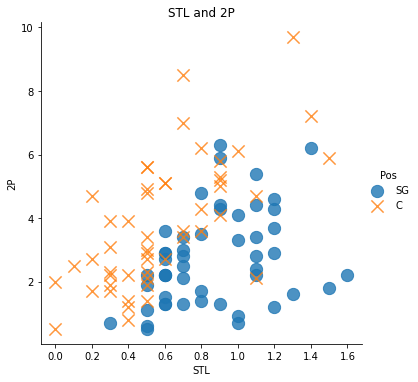

In [ ]:
sns.lmplot("STL","2P",data=df, fit_reg=False, scatter_kws={"s": 150}, markers=["o","x"], hue="Pos")
plt.title("STL and 2P")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST and 2P')

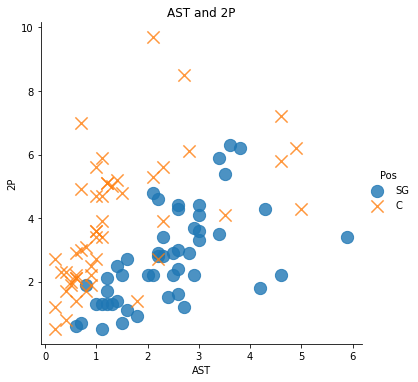

In [ ]:
sns.lmplot("AST","2P",data=df, fit_reg=False, scatter_kws={"s": 150}, markers=["o","x"], hue="Pos")
plt.title("AST and 2P")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLK and 3P')

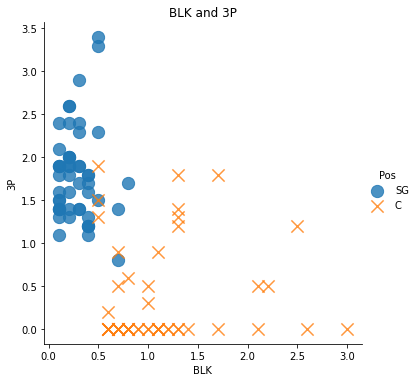

In [ ]:
sns.lmplot("BLK","3P",data=df, fit_reg=False, scatter_kws={"s": 150}, markers=["o","x"], hue="Pos")
plt.title("BLK and 3P")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TRB and 3P')

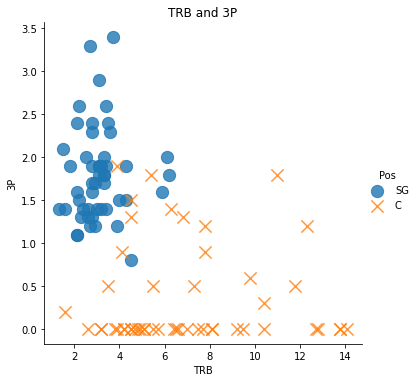

In [ ]:
sns.lmplot("TRB","3P",data=df, fit_reg=False, scatter_kws={"s": 150}, markers=["o","x"], hue="Pos")
plt.title("TRB and 3P")

In [ ]:
df.drop(['2P','AST','STL'], axis=1, inplace = True)

In [ ]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.shape[0]
test.shape[0]

20

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9,
 0.8625,
 0.8875,
 0.9125,
 0.9125,
 0.9,
 0.8875,
 0.8875,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8125,
 0.8125,
 0.8125,
 0.8125,
 0.775]

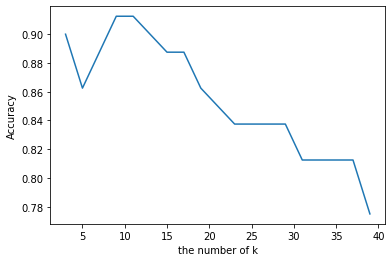

In [ ]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()